   SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  EDA_Sympathetic  \
0         10.0                  2.621797     34.453445         4.494259   
1         16.0                 51.280746     78.151583       379.047514   
2         14.0                 59.987188    162.382167       492.450999   
3         22.0                 11.720974     46.492271        91.661268   
4         22.0                 28.772146     35.574552        96.906400   

   EDA_SympatheticN  EDA_Autocorrelation Participant    Condition  
0          0.000111             0.864189       sub-1     baseline  
1          0.001313             0.819143       sub-1   spiderhand  
2          0.005456             0.933850       sub-1  spidervideo  
3          0.000750             0.864598       sub-2     baseline  
4          0.000321             0.717274       sub-2   spiderhand  


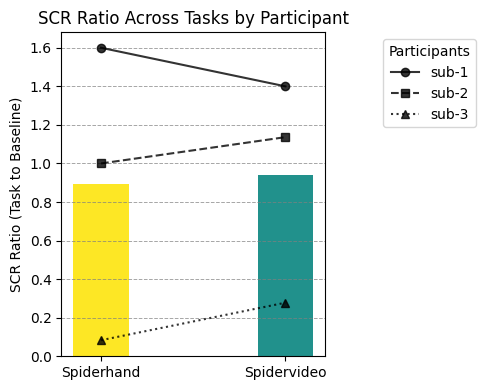

0.8944444444444445
0.9380471380471379


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to folders
results_folder = '/Users/erwin/Documents/ProjectPsychophysiologyData/results/'

# Load the .csv file containing the summary of the results
filename = results_folder + 'eda_results.csv'
results = pd.read_csv(filename)

print(results.head())

# Filter rows for each condition
baseline = results[results['Condition'] == 'baseline']
spiderhand = results[results['Condition'] == 'spiderhand']
spidervideo = results[results['Condition'] == 'spidervideo']

# Select the column containing the parameter of interest
scr_baseline = baseline['SCR_Peaks_N']
scr_spiderhand = spiderhand['SCR_Peaks_N']
scr_spidervideo = spidervideo['SCR_Peaks_N']

# Group by participant and calculate ratios for each
participants = results['Participant'].unique()
participant_data = {}
for participant in participants:
    baseline_participant = baseline[baseline['Participant'] == participant]['SCR_Peaks_N'].values[0]
    spiderhand_participant = spiderhand[spiderhand['Participant'] == participant]['SCR_Peaks_N'].values[0]
    spidervideo_participant = spidervideo[spidervideo['Participant'] == participant]['SCR_Peaks_N'].values[0]
    
    participant_data[participant] = [
        spiderhand_participant / baseline_participant,
        spidervideo_participant / baseline_participant
    ]

# Calculate mean ratios for each task
avg_ratio_spiderhand = np.mean([data[0] for data in participant_data.values()])
avg_ratio_spidervideo = np.mean([data[1] for data in participant_data.values()])

# Data for the bar plot
tasks = ['Spiderhand', 'Spidervideo']
averages = [avg_ratio_spiderhand, avg_ratio_spidervideo]

# Define bar colors for the conditions
bar_colors = ['#fde725', '#21918c']

# Define line styles and marker styles for participants
line_styles = ['solid', 'dashed', 'dotted']  # Different line styles for participants
marker_styles = ['o', 's', '^']  # Different marker shapes for participants

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(tasks, averages, color=bar_colors, width=0.3)

# Plot lines and markers for each participant
for i, (participant, data) in enumerate(participant_data.items()):
    ax.plot(
        tasks,  # Conditions
        data,   # Data for each condition
        marker=marker_styles[i % len(marker_styles)], 
        linestyle=line_styles[i % len(line_styles)], 
        color='black', 
        label=f'{participant}',  # Label for the participant
        alpha=0.8,
        linewidth=1.5
    )

# Add labels and title
ax.set_ylabel('SCR Ratio (Task to Baseline)')
ax.set_title('SCR Ratio Across Tasks by Participant')

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1), title='Participants')

# Add grid lines
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# Display the plot and save
figure_filename = results_folder + 'eda_summary_with_lines.png'
plt.tight_layout()
plt.subplots_adjust(right=0.55)
plt.savefig(figure_filename, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Print average ratios
print(avg_ratio_spiderhand)
print(avg_ratio_spidervideo)
